In [21]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.model_selection import train_test_split

In [38]:
# Loading data
colnames = ['Sample_code_number', 'Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape',
                    'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
                    'Normal_Nucleoli', 'Mitoses', 'Class']
data = pd.read_csv("breast-cancer-wisconsin.data", names=colnames)
data.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [39]:
# Data pre processing
data = data.replace({'Class': {2: "Benign", 4: "Malignant"}})
# Replacing the missing values with 1
# data = data.replace({'?': 1})
# Remove data wich has missing values
data = data[data.Bare_Nuclei != "?"]

total_samples = data['Sample_code_number'].count()
print("Number of columns\t: {}".format(total_samples))
cat_vars = ['Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape',
                    'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
                    'Normal_Nucleoli', 'Mitoses', 'Class']
data_final = data[cat_vars]
data_final.head()

Number of columns	: 683


,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,Benign
1,5,4,4,5,7,10,3,2,1,Benign
2,3,1,1,1,2,2,3,1,1,Benign
3,6,8,8,1,3,4,3,7,1,Benign
4,4,1,1,3,2,1,3,1,1,Benign


In [40]:
X = data_final.loc[:, data_final.columns != 'Class']
y = data_final.loc[:, data_final.columns == 'Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.349, random_state=1)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y.head()

,Class
0,Benign
1,Benign
2,Benign
3,Benign
4,Benign


In [41]:
# tree.plot_tree(clf.fit(iris.data, iris.target))

In [42]:
 print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(
            clf.score(X_test, np.ravel(y_test, order='C'))))
y_pred = clf.predict(X_test)
confusion_matrix_out = confusion_matrix(y_test, np.ravel(y_pred, order='C'))
print("Confusion Matrix: \n {}".format(confusion_matrix_out))
print("Accuracy: {}".format(round((confusion_matrix_out[0][0] + confusion_matrix_out[1][1]) * 100.0 / (
            sum(confusion_matrix_out[0]) + sum(confusion_matrix_out[1])), 2)))
print("Malignant recall: {}".format(round(confusion_matrix_out[1][1]*100.0/sum(confusion_matrix_out[1]),2)))

Accuracy of logistic regression classifier on test set: 0.94
Confusion Matrix: 
 [[147   5]
 [ 10  77]]
Accuracy: 93.72
Malignant recall: 88.51


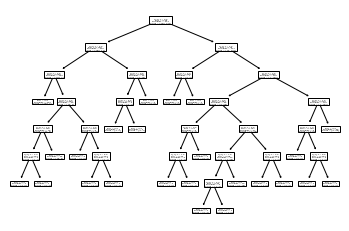

In [43]:
dtree= tree.plot_tree(clf)

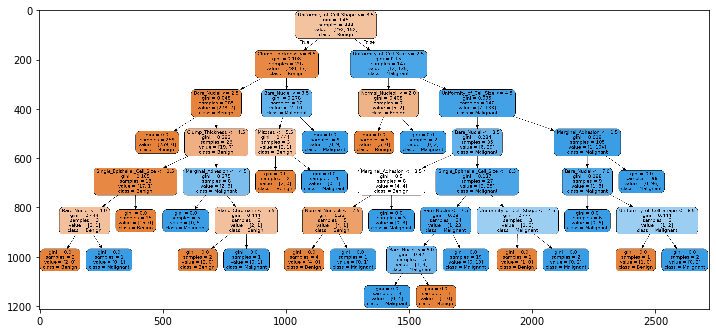

In [47]:
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.image as mpimg
import io

from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

dot_data = io.StringIO()

export_graphviz(clf, out_file=dot_data, feature_names=cat_vars[:-1], class_names=["Benign","Malignant"], rounded=True, filled=True)

filename = "tree.png"
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png(filename)

plt.figure(figsize=(12,12))
img = mpimg.imread(filename)
imgplot = plt.imshow(img)

plt.show()

In [49]:
from chefboost import Chefboost as chef
import pandas as pd
from sklearn.model_selection import train_test_split

# Loading data
colnames = ['Sample_code_number', 'Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape',
                    'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
                    'Normal_Nucleoli', 'Mitoses', 'Decision']
data = pd.read_csv("breast-cancer-wisconsin.data", names=colnames)
data.head()


,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Decision
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [50]:
# Data pre processing

data = data.replace({'Decision': {2: 0, 4: 1}})

# This time no need to replace the missing values
# Replacing the missing values with 1
# data = data.replace({'?': 1})
# Remove data wich has missing values
# data = data[data.Bare_Nuclei != "?"]

total_samples = data['Sample_code_number'].count()
print("Number of columns\t: {}".format(total_samples))

# Remove the code number from data
final_data = data.drop(['Sample_code_number'], axis=1)
final_data.head()

Number of columns	: 699


,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Decision
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [51]:
# Split train and test set
df = final_data.copy()
X = df.loc[:, df.columns != 'Decision']
y = df.loc[:, df.columns == 'Decision']
X.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.349, random_state=1)
training_set = pd.concat([X_train, y_train], axis=1)
print("Training set size: {}".format(X_train.Mitoses.count()))
print("Testing set size: {}".format(X_test.Mitoses.count()))

Training set size: 455
Testing set size: 244


In [52]:
X_train.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
374,3,1,2,1,2,1,2,1,1
483,8,7,8,5,5,10,9,10,1
38,5,4,4,9,2,10,5,6,1
480,5,1,1,1,1,1,1,1,1
596,4,1,2,1,2,1,2,1,1


In [53]:
y_train.head()

,Decision
374,0
483,1
38,1
480,0
596,0


In [54]:
# Training
# config = {'algorithm': 'ID3'}
config = {'algorithm': 'C4.5'}
model = chef.fit(training_set, config)

Regression  tree is going to be built...
MAE:  0.03333333333333333
RMSE:  0.13734798456646122
Mean:  0.3516483516483517
MAE / Mean:  9.479166666666666 %
RMSE / Mean:  39.05833311108741 %
finished in  0.6214327812194824  seconds


In [55]:
X_test.Clump_Thickness.count()

244

In [56]:
y_test.head()

,Decision
584,0
417,0
606,0
349,1
134,0


In [58]:
# Calculate Accuracy
_true = 0
_false = 0
accuracy = {"Benign": {"Malignant":0, "Benign":0}, "Malignant":{"Malignant":0, "Benign":0}}
for i in range(X_test.Clump_Thickness.count()):
    prediction = chef.predict(model, X_test.iloc[i])
    if prediction != None and round(prediction) == y_test.iloc[i].Decision:
        _true += 1
        if y_test.iloc[i].Decision == 0:
            accuracy["Benign"]["Benign"] += 1 
        else:
            accuracy["Malignant"]["Malignant"] += 1 
    else:
        _false += 1    
        if y_test.iloc[i].Decision == 0:
            accuracy["Benign"]["Malignant"] += 1 
        else:
            accuracy["Malignant"]["Benign"] += 1 
print(accuracy)
print("\nTotal Accuracy: {:0.2f}".format(_true*100/(_true+_false)))
print("\nConsfusion Matrix:\nGround Truth | Prediction- \tBenign Malignant\nBenign\t\t\t\t{}\t{}\nMalignant\t\t\t{}\t{}".format(accuracy["Benign"]["Benign"], accuracy["Benign"]["Malignant"], accuracy["Malignant"]["Benign"], accuracy["Malignant"]["Malignant"]))
print("\nMalignant Recall: {:0.2f}".format(accuracy["Malignant"]["Malignant"]*100/(accuracy["Malignant"]["Benign"]+accuracy["Malignant"]["Malignant"])))
print("\n")

{'Benign': {'Malignant': 5, 'Benign': 158}, 'Malignant': {'Malignant': 72, 'Benign': 9}}

Total Accuracy: 94.26

Consfusion Matrix:
Ground Truth | Prediction- 	Benign Malignant
Benign				158	5
Malignant			9	72

Malignant Recall: 88.89




In [124]:
pred_loc = 1
print(df.iloc[pred_loc])
prediction = chef.predict(model, df.iloc[pred_loc])
print("\nPrediction:", prediction)

Clump_Thickness                 5
Uniformity_of_Cell_Size         4
Uniformity_of_Cell_Shape        4
Marginal_Adhesion               5
Single_Epithelial_Cell_Size     7
Bare_Nuclei                    10
Bland_Chromatin                 3
Normal_Nucleoli                 2
Mitoses                         1
Decision                        2
Name: 1, dtype: object

Prediction: 3.0
